# KPMG VIRTUAL INTERNSHIP PROJECT

## TASK: 1 - Data Quality Assessment
### Assessment of data quality and completeness in preparation for analysis.
#### The client provided KPMG with 3 datasets:
- Customer Demographic
- Customer Addresses
- Transactions data in the past 3 months

In [21]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring Warnings
import  warnings
warnings.filterwarnings("ignore")

In [22]:
# Setting max column

pd.set_option("max_columns",None)

# Reading the Dataset

In [23]:
data = pd.ExcelFile("KPMG.xlsx")

# Reading each sheets

In [24]:
Transactions = pd.read_excel(data,"Transactions", header=1)
NewCustomerList = pd.read_excel(data, "NewCustomerList", header=1)
CustomerDemographic = pd.read_excel(data, "CustomerDemographic", header=1)
CustomerAddress = pd.read_excel(data, "CustomerAddress", header=1)

# Exploring each Data Set

# 1. Transaction Data Set

In [25]:
# Reading the first 5 column

Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Total number of rows and columns

print("Total No of Rows = ", Transactions.shape[0])
print("Total No of Columns = ", Transactions.shape[1])

Total No of Rows =  20000
Total No of Columns =  26


In [27]:
# Info to check null values and data type of each column

Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

##### Here, we can see that, column 13 till 25 contain only NULL values. We will drop these column.

In [28]:
# Removing the unwanted columns from the data set

Transactions = Transactions.iloc[:, 0:13]
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [29]:
# Checking Statistical Summary

Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [30]:
# Converting product_first_sold_date to Date time Data type

Transactions.product_first_sold_date = pd.to_datetime(Transactions.product_first_sold_date)

In [31]:
# Checking the info and shape again

Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [32]:
Transactions.shape

(20000, 13)

In [33]:
# Checking the null values

Transactions.isnull().sum().sort_values(ascending=False)

online_order               360
brand                      197
product_line               197
product_class              197
product_size               197
standard_cost              197
product_first_sold_date    197
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
order_status                 0
list_price                   0
dtype: int64

In [34]:
# Checking the percentage of Null Values in the data

100*(Transactions.isnull().sum()/Transactions.shape[0]).sort_values(ascending=False)

online_order               1.800
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
standard_cost              0.985
product_first_sold_date    0.985
transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
order_status               0.000
list_price                 0.000
dtype: float64

##### Missing values are present in 7 columns and the percentage is also very minimal. They can be dropped or treated according to the nature of analysis.

In [35]:
# Checking for Duplicate Values

Transactions.duplicated().sum()

0

In [36]:
# Checking the uniqueness in each column

Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

# Analysing Categorical Variable

In [37]:
cat_var = Transactions.select_dtypes(include="object").columns
cat_var

Index(['order_status', 'brand', 'product_line', 'product_class',
       'product_size'],
      dtype='object')

In [38]:
Transactions.order_status.value_counts(normalize=True)

Approved     0.99105
Cancelled    0.00895
Name: order_status, dtype: float64

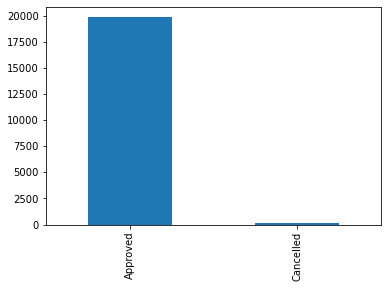

In [39]:
Transactions.order_status.value_counts().plot.bar()
plt.show()

In [40]:
Transactions.brand.value_counts(normalize=True)

Solex             0.214765
Giant Bicycles    0.167247
WeareA2B          0.166389
OHM Cycles        0.153664
Trek Bicycles     0.150987
Norco Bicycles    0.146947
Name: brand, dtype: float64

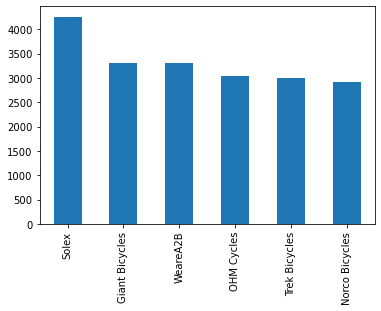

In [41]:
Transactions.brand.value_counts().plot.bar()
plt.show()

In [42]:
Transactions.product_line.value_counts(normalize=True)

Standard    0.715851
Road        0.200475
Touring     0.062314
Mountain    0.021360
Name: product_line, dtype: float64

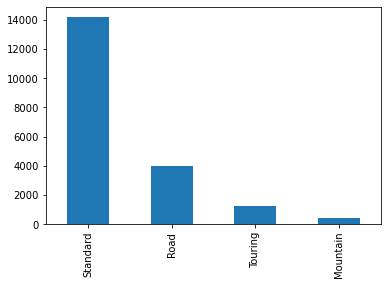

In [43]:
Transactions.product_line.value_counts().plot.bar()
plt.show()

In [44]:
Transactions.product_class.value_counts(normalize=True)

medium    0.698177
high      0.152149
low       0.149674
Name: product_class, dtype: float64

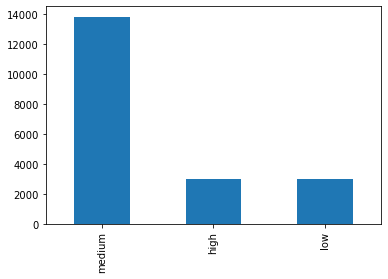

In [45]:
Transactions.product_class.value_counts().plot.bar()
plt.show()

In [46]:
Transactions.product_size.value_counts(normalize=True)

medium    0.655961
large     0.200778
small     0.143261
Name: product_size, dtype: float64

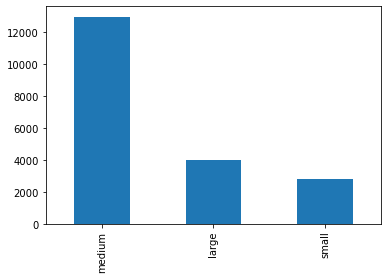

In [47]:
Transactions.product_size.value_counts().plot.bar()
plt.show()

# Analysing Numerical Variable

In [48]:
num_col = Transactions.select_dtypes(exclude="object").columns
num_col

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [49]:
max(Transactions.transaction_date)

Timestamp('2017-12-30 00:00:00')

In [50]:
min(Transactions.transaction_date)

Timestamp('2017-01-01 00:00:00')

##### The data is present from 1st Jan 2017 to 30th Dec 2017

In [51]:
Transactions.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

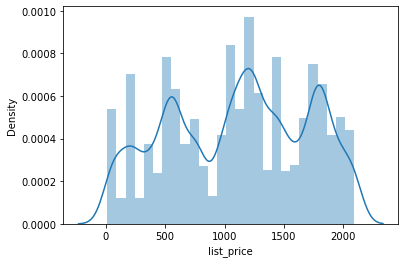

In [52]:
sns.distplot(Transactions.list_price)
plt.show()

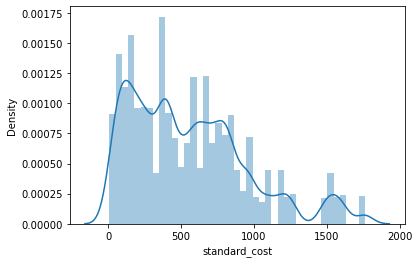

In [53]:
sns.distplot(Transactions.standard_cost)
plt.show()

In [54]:
Transactions.product_first_sold_date.sample(10)

18416   1970-01-01 00:00:00.000042458
14601   1970-01-01 00:00:00.000040336
2471    1970-01-01 00:00:00.000033549
9187    1970-01-01 00:00:00.000033455
983     1970-01-01 00:00:00.000038002
6945    1970-01-01 00:00:00.000037823
3343    1970-01-01 00:00:00.000034244
5629    1970-01-01 00:00:00.000037698
16905   1970-01-01 00:00:00.000042105
8291    1970-01-01 00:00:00.000033879
Name: product_first_sold_date, dtype: datetime64[ns]

##### Values present in the product_first_sold_date column are not correct as same date is repeated.

# 2. NewCustomerList Data Set

In [55]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [56]:
# Total number of rows and columns

print("Total No of Rows = ", NewCustomerList.shape[0])
print("Total No of Columns = ", NewCustomerList.shape[1])

Total No of Rows =  1000
Total No of Columns =  23


In [57]:
# Info to check null values and data type of each column

NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [58]:
# Dropping unnamed columns

NewCustomerList.drop(["Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20"], axis=1,inplace=True)

In [59]:
NewCustomerList.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875


In [60]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [61]:
# Checking Statistical Summary

NewCustomerList.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [62]:
# Checking the null values

NewCustomerList.isnull().sum().sort_values(ascending=False)

job_industry_category                  165
job_title                              106
last_name                               29
DOB                                     17
first_name                               0
address                                  0
Rank                                     0
property_valuation                       0
country                                  0
state                                    0
postcode                                 0
owns_car                                 0
tenure                                   0
deceased_indicator                       0
wealth_segment                           0
past_3_years_bike_related_purchases      0
gender                                   0
Value                                    0
dtype: int64

##### Customer ID column is not present in the NewCustomerList Dataset

In [63]:
# Checking the percentage of Null Values in the data

100*(NewCustomerList.isnull().sum()/NewCustomerList.shape[0]).sort_values(ascending=False)

job_industry_category                  16.5
job_title                              10.6
last_name                               2.9
DOB                                     1.7
first_name                              0.0
address                                 0.0
Rank                                    0.0
property_valuation                      0.0
country                                 0.0
state                                   0.0
postcode                                0.0
owns_car                                0.0
tenure                                  0.0
deceased_indicator                      0.0
wealth_segment                          0.0
past_3_years_bike_related_purchases     0.0
gender                                  0.0
Value                                   0.0
dtype: float64

In [64]:
# Checking for Duplicate Values

NewCustomerList.duplicated().sum()

0

In [65]:
# Checking nnunique values

NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

# Analysing Categorical Variable

In [66]:
cat_var = NewCustomerList.select_dtypes(include="object").columns
cat_var

Index(['first_name', 'last_name', 'gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'address', 'state', 'country'],
      dtype='object')

In [67]:
# Analysing Gender column

NewCustomerList.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [68]:
# Analysing gender="U"

NewCustomerList[NewCustomerList.gender=="U"]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


##### There are 17 columns with unknown/unspecified gender and DOB is also not valid.

In [69]:
# Analysing job_industry_category

NewCustomerList.job_industry_category.value_counts(normalize=True)

Financial Services    0.243114
Manufacturing         0.238323
Health                0.182036
Retail                0.093413
Property              0.076647
IT                    0.061078
Entertainment         0.044311
Argiculture           0.031138
Telecommunications    0.029940
Name: job_industry_category, dtype: float64

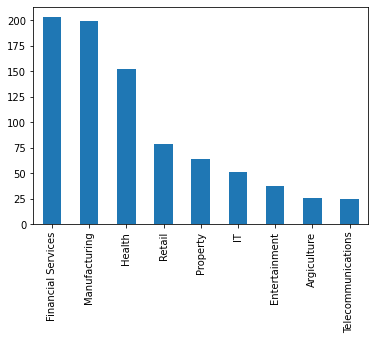

In [70]:
NewCustomerList.job_industry_category.value_counts().plot.bar()
plt.show()

In [71]:
cat_var

Index(['first_name', 'last_name', 'gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'address', 'state', 'country'],
      dtype='object')

In [72]:
# Analysing job_industry_category

NewCustomerList.wealth_segment.value_counts(normalize=True)

Mass Customer        0.508
High Net Worth       0.251
Affluent Customer    0.241
Name: wealth_segment, dtype: float64

In [73]:
# Analysing deceased_indicator

NewCustomerList.deceased_indicator.value_counts(normalize=True)

N    1.0
Name: deceased_indicator, dtype: float64

In [74]:
# Analysing owns_car

NewCustomerList.owns_car.value_counts(normalize=True)

No     0.507
Yes    0.493
Name: owns_car, dtype: float64

In [75]:
# Analysing state

NewCustomerList.state.value_counts(normalize=True)

NSW    0.506
VIC    0.266
QLD    0.228
Name: state, dtype: float64

In [76]:
# Analysing country

NewCustomerList.country.value_counts(normalize=True)

Australia    1.0
Name: country, dtype: float64

# Analysing Numerical Variables

In [77]:
num_col = NewCustomerList.select_dtypes(exclude="object").columns
num_col

Index(['past_3_years_bike_related_purchases', 'DOB', 'tenure', 'postcode',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [78]:
NewCustomerList.DOB

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: DOB, Length: 1000, dtype: datetime64[ns]

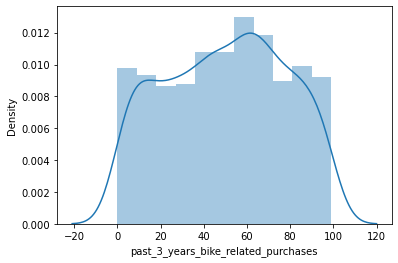

In [79]:
sns.distplot(NewCustomerList.past_3_years_bike_related_purchases)
plt.show()

# 3. CustomerDemographic Data Set

In [80]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Checking info

CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [82]:
# Removing the unnamed columns

CustomerDemographic = CustomerDemographic.iloc[:,0:13]
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [83]:
# Checking number of rows and column

CustomerDemographic.shape

(4000, 13)

In [84]:
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [85]:
# Checking null Values

CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [86]:
# Checking duplicate values

CustomerDemographic.duplicated().sum()

0

In [87]:
# Checking unique Values

CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [88]:
cat_var = CustomerDemographic.select_dtypes(include="object").columns
cat_var

Index(['first_name', 'last_name', 'gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car'],
      dtype='object')

In [89]:
CustomerDemographic.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [90]:
# Replacing M with Male,F with Female and Femal with Female

CustomerDemographic.gender = CustomerDemographic.gender.replace({"M":"Male","F":"Female","Femal":"Female"})

In [91]:
CustomerDemographic.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

##### 88 rows with uncategorised gender

In [92]:
CustomerDemographic.job_title.value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Human Resources Assistant IV             4
Health Coach III                         3
Health Coach I                           3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [93]:
CustomerDemographic.job_industry_category.value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [94]:
CustomerDemographic.wealth_segment.value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [95]:
CustomerDemographic.deceased_indicator.value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [96]:
CustomerDemographic.default.value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
ç¤¾æç§å­¸é¢èªå­¸ç ç©¶æ                     31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [97]:
# Droping Default column

CustomerDemographic.drop("default", axis=1, inplace=True)

In [98]:
CustomerDemographic.owns_car.value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

# Analysing Numerical Column

In [99]:
num_col = CustomerDemographic.select_dtypes(exclude="object").columns
num_col

Index(['customer_id', 'past_3_years_bike_related_purchases', 'DOB', 'tenure'], dtype='object')

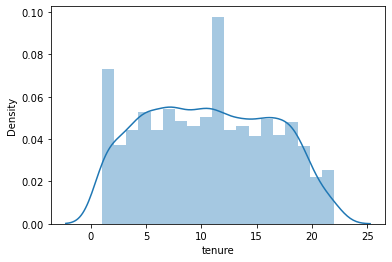

In [100]:
sns.distplot(CustomerDemographic.tenure)
plt.show()

In [101]:
CustomerDemographic.DOB

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3995   1975-08-09
3996   2001-07-13
3997          NaT
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 4000, dtype: datetime64[ns]

# 4. CustomerAddress Data Set

In [102]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# Shape

CustomerAddress.shape

(3999, 26)

In [104]:
# Info

CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3999 non-null   int64  
 1   address             3999 non-null   object 
 2   postcode            3999 non-null   int64  
 3   state               3999 non-null   object 
 4   country             3999 non-null   object 
 5   property_valuation  3999 non-null   int64  
 6   Unnamed: 6          0 non-null      float64
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          0 non-null      float64
 10  Unnamed: 10         0 non-null      float64
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
 13  Unnamed: 13         0 non-null      float64
 14  Unnamed: 14         0 non-null      float64
 15  Unnamed: 15         0 non-null      float64
 16  Unname

In [105]:
# Removing unnamed columns

CustomerAddress = CustomerAddress.iloc[:, 0:6]
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [106]:
CustomerAddress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [107]:
# Null values

CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [108]:
# Duplicate Values

CustomerAddress.duplicated().sum()

0

In [109]:
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [110]:
CustomerAddress.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [113]:
# Replacing Victoria with "VIC" and New South Wales with "NSW"

CustomerAddress.state = CustomerAddress.state.replace({"Victoria":"VIC", "New South Wales":"NSW"})

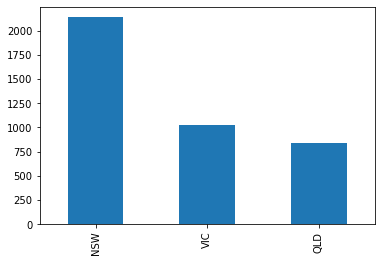

In [114]:
CustomerAddress.state.value_counts().plot.bar()
plt.show()

In [111]:
CustomerAddress.property_valuation.value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

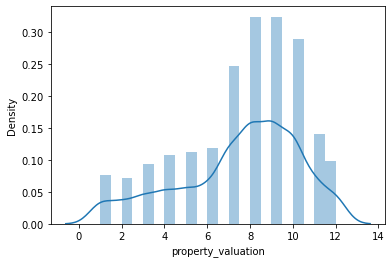

In [112]:
sns.distplot(CustomerAddress.property_valuation)
plt.show()

### Now the DataSets are Clean.